# What is this project about?
I first got in touch with the concept of "Data Quality Report" from fraud analytics class in Spring 2019, and I realized this preliminary data exploration is essential before any analysis. 

A data quality report is a general overview of the variables, and it contains three parts:
1. A high-level description of the data
2. A table listing summary information
3. Short description with a picture

A good data quality report serves as a gatekeeper to ensure the data is matching with the business. Upon completing this report, one would be familiar with the data. Additionally, it lays a good foundation for the creation of expert variables.   

Though, creating a detailed data quality report is time-consuming and rather tedious especially when we need to document characteristics such as length or minimum value for every single variable. During my homework assignment, I wrote some functions and loops to save some repetitive work. The code here is not perfect since it is customized for a particular dataset, but anyone who is interested can make slight adjustment and apply it to other datasets. Hope you find this project helpful :)

# Preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
#Source for dataset:
#https://data.cityofnewyork.us/Housing-Development/Property-Valuation-and-Assessment-Data/rgy2-tti8 
mydata=pd.read_csv('NY property data.csv')

In [3]:
mydata.head()

,RECORD,BBLE,B,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,...,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE
0,1,1000010101,1,1,101,NaN,U S GOVT LAND & BLDGS,P7,4,500,...,0,0,3775500.0,8613000.0,3775500.0,8613000.0,NaN,FINAL,2010/11,AC-TR
1,2,1000010201,1,1,201,NaN,U S GOVT LAND & BLDGS,Z9,4,27,...,0,0,11111400.0,80690400.0,11111400.0,80690400.0,NaN,FINAL,2010/11,AC-TR
2,3,1000020001,1,2,1,NaN,DEPT OF GENERAL SERVI,Y7,4,709,...,709,564,32321790.0,40179510.0,32321790.0,40179510.0,NaN,FINAL,2010/11,AC-TR
3,4,1000020023,1,2,23,NaN,DEPARTMENT OF BUSINES,T2,4,793,...,85,551,13644000.0,15750000.0,13644000.0,15750000.0,NaN,FINAL,2010/11,AC-TR
4,5,1000030001,1,3,1,NaN,PARKS AND RECREATION,Q1,4,323,...,89,57,106348680.0,107758350.0,106348680.0,107758350.0,NaN,FINAL,2010/11,AC-TR


# Summary Table

At first, since this dataset only contains int64, float64, and object, I created the loop based on datatype: 

    if not object->calculate summary statistics like mean, SD, max, min
    if object->extract the most common field

However, many categorical variables in this dataset are either in int64 or float64 format (for example, Zip code). It is biased to run summary based on data type. Thus, I took another approach--running the same if statement on field type, and this "Field Type" variable is manually encoded based on an assessment of the data. 

In [4]:
#add filetype 
FieldType=[
"Categorical",
"Categorical",
"Categorical",
"Categorical",
"Categorical",
"Categorical",
"Text",
"Categorical",
"Categorical",
"Numeric",
"Numeric",
"Categorical",
"Numeric",
"Numeric",
"Numeric",
"Numeric",
"Numeric",
"Numeric",
"Numeric",
"Text",
"Categorical",
"Categorical",
"Numeric",
"Numeric",
"Numeric",
"Numeric",
"Numeric",
"Numeric",
"Numeric",
"Categorical",
"Time",
"Categorical"
] 

In [5]:
#Create data frame
summary=pd.DataFrame(mydata.dtypes)
summary.index.name="Field Name"
colname=["Data Type"]
summary.columns=colname
summary["Field Type"]=FieldType

In [6]:
#add denominator for % populated
num=len(mydata) 

In [7]:
#function to retrieve most common item for categorical data
def most_common(lst):
    '''
    Return the most frequent record from a list
    '''
    test=pd.DataFrame(lst.value_counts())
    test.reset_index(inplace=True)
    return test.iloc[0,0]

In [8]:
#create loop to create summary table based on file type
for lab, row in summary.iterrows():
    #add general info regardless of data type
    summary.loc[lab,"# of Records with Value"]=int(mydata[lab].count())
    summary.loc[lab,"% Populated"]=round(mydata[lab].count()*100/num,2)
    summary.loc[lab,"# Unique Values"]=int(len(mydata[lab].dropna(axis=0).unique()))
    summary.loc[lab,"# Records with Value Zero"]=int(len(mydata[mydata[lab]==0]))
    #for numeric
    if summary.loc[lab,"Field Type"]=="Numeric":
        summary.loc[lab,"Mean"]=round(np.nanmean(mydata[lab]),2)
        summary.loc[lab,"SD"]=round(np.nanstd(mydata[lab]),2)
        summary.loc[lab,"Min"]=round(np.nanmin(mydata[lab]),2)
        summary.loc[lab,"Max"]=round(np.nanmax(mydata[lab]),2)
        summary.loc[lab,"Most Common Field"]=" "
    #for non-numeric
    else:
        summary.loc[lab,"Mean"]=" "
        summary.loc[lab,"SD"]=" "
        summary.loc[lab,"Min"]=" "
        summary.loc[lab,"Max"]=" "
        summary.loc[lab,"Most Common Field"]=most_common(mydata[lab])

In [9]:
summary

,Data Type,Field Type,# of Records with Value,% Populated,# Unique Values,# Records with Value Zero,Mean,SD,Min,Max,Most Common Field
Field Name,,,,,,,,,,,
RECORD,int64,Categorical,1070994.0,100.00,1070994.0,0.0,,,,,2047
BBLE,object,Categorical,1070994.0,100.00,1070994.0,0.0,,,,,3008560047
B,int64,Categorical,1070994.0,100.00,5.0,0.0,,,,,4
BLOCK,int64,Categorical,1070994.0,100.00,13984.0,0.0,,,,,3944
LOT,int64,Categorical,1070994.0,100.00,6366.0,0.0,,,,,1
EASEMENT,object,Categorical,4636.0,0.43,12.0,0.0,,,,,E
OWNER,object,Text,1039249.0,97.04,863347.0,0.0,,,,,PARKCHESTER PRESERVAT
BLDGCL,object,Categorical,1070994.0,100.00,200.0,0.0,,,,,R4
TAXCLASS,object,Categorical,1070994.0,100.00,11.0,0.0,,,,,1


In [11]:
#transform to csv file
summary.to_csv("Summary.csv")

# Visualization

### Defining Functions 

When constructing a distribution plot, if a variable contains a large number of extreme values or a wide range with a handful of outliers, selecting a smaller x range might be a better option.

The following functions are defined to calculate a good cutoff point for x range. 

In [12]:
#define cutoff as Q3+1.5*IQR
def calIQR(lst):
    '''
    Calculate IQR from a given list of value.
    '''
    Q1=np.percentile(lst,25)
    Q3=np.percentile(lst,75)
    IQR=Q3-Q1
    upper=Q3+1.5*IQR
    return round(upper,2)

In [13]:
#define upperlim as mean+3*SD
def calSD(lst):
    '''
    Calculate the value three standard deviation away from mean from a given list of value.
    '''
    upper=np.nanmean(lst)+3*np.nanstd(lst)
    return round(upper,2)

The following functions are defined to construct distplot with given column name and a cutoff point for x range.

In [14]:
#plot with given column name and calculate upperlim
def cutoffplt(name,function=calSD):
    '''
    Construct a distplot based on given column name and function for x range.
    Default function is calSD since it gives a wider range than calIQR
    '''
    xhigh=function(mydata[name])
    plt.xlim(0,xhigh)
    temp=mydata[mydata[name]<=xhigh]
    sns.distplot(temp[name],bins=100,kde=True)

In [15]:
#plot with given name and specified x upper limit
def highplt(name,x):
    '''
    Construct a distplot based on given column name and x range.
    '''
    xhigh=x
    plt.xlim(0,xhigh)
    temp=mydata[mydata[name]<=xhigh]
    sns.distplot(temp[name],bins=100,kde=True)

### Categorical

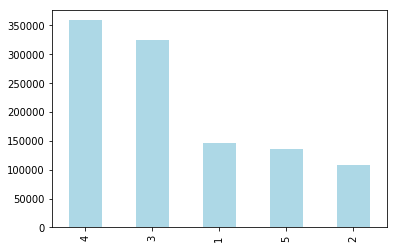

In [16]:
#to construct bar chart on 'B'
mydata['B'].value_counts().plot(kind='bar',color='lightblue');

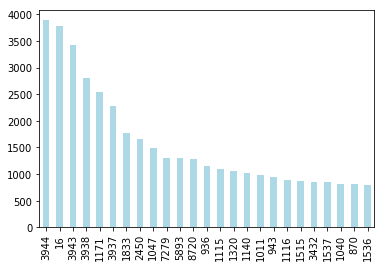

In [17]:
#to construct bar chart for top 25 records
mydata['BLOCK'].value_counts().head(25).plot(kind='bar',color='lightblue');

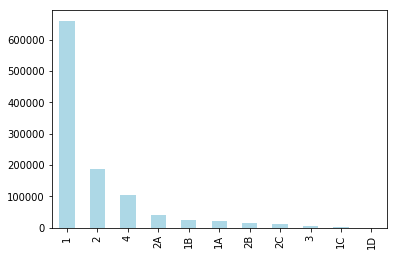

In [18]:
#It is not easy to visualize the last couple variables, so to consider changing y-axis
mydata['TAXCLASS'].value_counts().plot(kind='bar',color='lightblue');

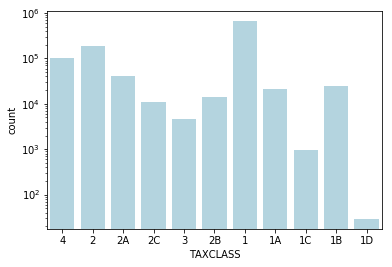

In [19]:
#to change y-axis to log scale
plot=sns.countplot(x='TAXCLASS',data=mydata,color="lightblue")
plot.set_yscale('log')

### Numeric

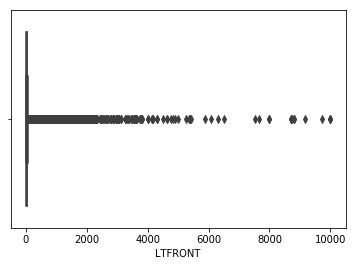

In [20]:
#Lets start with a box plot. Seems like there are a lot of outliers
sns.boxplot(mydata['LTFRONT']);

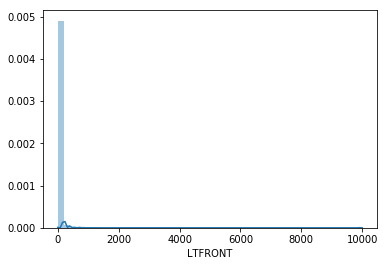

In [21]:
#Data concentrate on 0 even max number is reaching 10000
sns.distplot(mydata['LTFRONT']); 

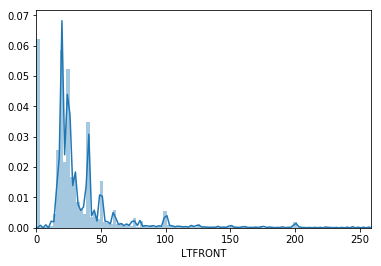

In [22]:
#try to set x range to mean plus three standard deviation
cutoffplt("LTFRONT")

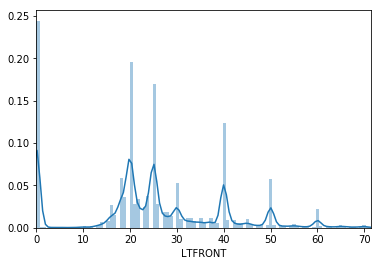

In [23]:
#try to set x range to Q3 plus 1.5 of IQR
cutoffplt("LTFRONT",calIQR)

--------

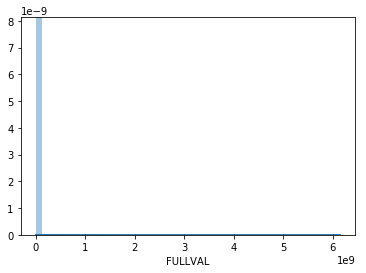

In [24]:
#Another variable
sns.distplot(mydata['FULLVAL']);

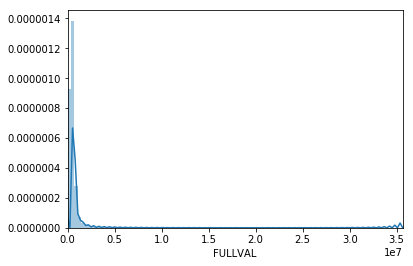

In [25]:
cutoffplt("FULLVAL")

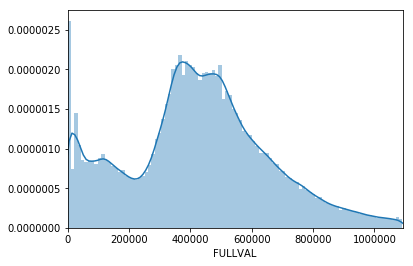

In [26]:
cutoffplt("FULLVAL",calIQR)

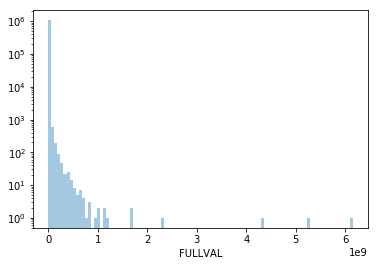

In [27]:
# to change y-axis to log scale 
temp = mydata[mydata['FULLVAL'] >= 0]
ax = sns.distplot(temp['FULLVAL'],bins=100, kde=False)
ax.set_yscale('log')

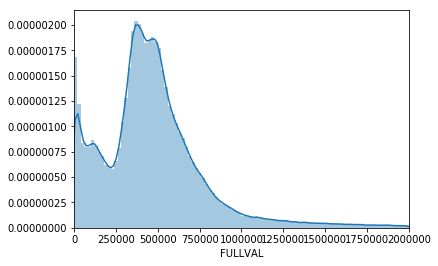

In [28]:
#when calSD, calIQR, and rescaling y-axis do not work well
#try manually encoding x range 
highplt("FULLVAL",2000000)

--------------

Now you are all set to start a data quality report! :D